https://www.analyticsvidhya.com/blog/2021/05/bitcoin-price-prediction-using-recurrent-neural-networks-and-lstm/

I am gonna design the model exactly like the one of this post without our features into the RNN and LSTM model.

Characteristic of the model:
1. Based in normal price
2. not Scaled y_test and y_train

# Importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2021-08-26 08:23:29.993549: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-26 08:23:29.993597: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data importing and preprocessing

In [2]:
data = pd.read_csv("../data/BTCUSD_4hours.csv").drop(columns=["Unnamed: 0", "log_open", "log_high", "log_low", "log_close"]).set_index("date")
data

,open,high,low,close,volume
date,,,,,
2011-12-31 08:00:00,4.390000,4.390000,4.390000,4.390000,0.455581
2011-12-31 16:00:00,4.490000,4.513333,4.490000,4.513333,31.620766
2012-01-01 04:00:00,4.580000,4.580000,4.580000,4.580000,1.502000
2012-01-01 16:00:00,4.840000,4.840000,4.840000,4.840000,10.000000
2012-01-01 20:00:00,5.000000,5.000000,5.000000,5.000000,10.100000
...,...,...,...,...,...
2021-08-22 12:00:00,48769.308417,48787.711375,48749.417500,48769.737750,1.697971
2021-08-22 16:00:00,48591.665708,48605.941333,48574.903375,48591.580833,0.463362
2021-08-22 20:00:00,48807.713542,48825.874417,48791.558000,48810.168750,0.605696


## Data Splitting

Splitting data into trainning and test data in a ratio of 80:20

In [3]:
train_len = int(len(data) * 0.8)
training_data  = data[:train_len]
data_test = data[train_len:]

## Scaling Data

Scaling X data with minmax

In [4]:
scaler = MinMaxScaler()

training_data = scaler.fit_transform(training_data)
training_data

array([[8.33515701e-06, 8.33079600e-06, 8.34486926e-06, 8.33537742e-06,
        6.16897150e-04],
       [1.34644844e-05, 1.46536566e-05, 1.34801734e-05, 1.46617152e-05,
        4.37644267e-02],
       [1.80808790e-05, 1.80714190e-05, 1.81019472e-05, 1.80813572e-05,
        2.06564198e-03],
       ...,
       [4.19168736e-01, 4.19129794e-01, 4.19404175e-01, 4.19028329e-01,
        4.69773021e-03],
       [4.20168032e-01, 4.20207430e-01, 4.20423019e-01, 4.20117718e-01,
        3.80389704e-03],
       [4.17432337e-01, 4.17424480e-01, 4.17557607e-01, 4.17249946e-01,
        9.23247959e-03]])

## Data Subsequences

In [5]:
X_train = [] 
Y_train = []
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,3])

In [6]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
Y_train

array([9.45103563e-05, 1.04256336e-04, 1.37084899e-04, ...,
       4.19028329e-01, 4.20117718e-01, 4.17249946e-01])

# Model

In [7]:
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

2021-08-26 08:23:30.942579: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-26 08:23:30.942617: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-26 08:23:30.942645: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-QQH7A32G): /proc/driver/nvidia/version does not exist
2021-08-26 08:23:30.942826: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [8]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics="mae")

In [9]:
es = EarlyStopping(patience=3, restore_best_weights=True)

In [10]:
history= model.fit(X_train, Y_train, 
                   epochs = 20, 
                   batch_size = 50, 
                   validation_split=0.1, 
                   callbacks=[es]
                  )

Epoch 1/20


2021-08-26 08:23:31.301903: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


299/299 [==============================] - 32s 101ms/step - loss: 0.0026 - mae: 0.0244 - val_loss: 0.0014 - val_mae: 0.0266
Epoch 2/20
299/299 [==============================] - 37s 123ms/step - loss: 0.0012 - mae: 0.0162 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 3/20
299/299 [==============================] - 38s 127ms/step - loss: 0.0011 - mae: 0.0167 - val_loss: 0.0016 - val_mae: 0.0301
Epoch 4/20
299/299 [==============================] - 39s 129ms/step - loss: 9.2626e-04 - mae: 0.0165 - val_loss: 0.0041 - val_mae: 0.0558


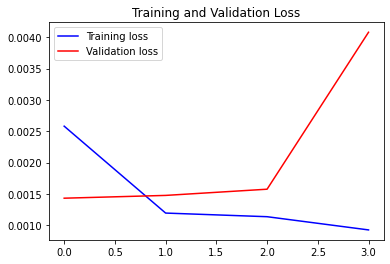

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Predicting

In [12]:
part_60_days = data.tail(60)
df= part_60_days.append(data_test)
df.head()

,open,high,low,close,volume
date,,,,,
2021-08-13 08:00:00,46323.764042,46344.453167,46302.557250,46324.655542,2.315832
2021-08-13 12:00:00,46448.522375,46470.757750,46427.801042,46450.762083,2.002964
2021-08-13 16:00:00,46470.304375,46485.275083,46455.076333,46471.016375,0.786690
2021-08-13 20:00:00,47596.672292,47629.672333,47577.008875,47606.697917,4.069320
2021-08-14 00:00:00,47634.651500,47643.631875,47622.239208,47632.714792,0.518105


In [13]:
inputs = scaler.transform(df)

In [14]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i]) 
    Y_test.append(inputs[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test) 
X_test.shape, Y_test.shape
Y_pred = model.predict(X_test) 
Y_pred, Y_test

(array([[1.9554967],
        [1.9571517],
        [1.9499577],
        ...,
        [1.9369528],
        [1.9436928],
        [1.9498174]], dtype=float32),
 array([0.41534744, 0.41801651, 0.41943976, ..., 2.50329058, 2.55312808,
        2.57873699]))

In [15]:
scaler.scale_

array([5.12932739e-05, 5.12664369e-05, 5.13530416e-05, 5.12946303e-05,
       1.38447854e-03])

In [16]:
scale = 1/scaler.scale_[0]

In [17]:
Y_test = Y_test*scale 
Y_pred = Y_pred*scale

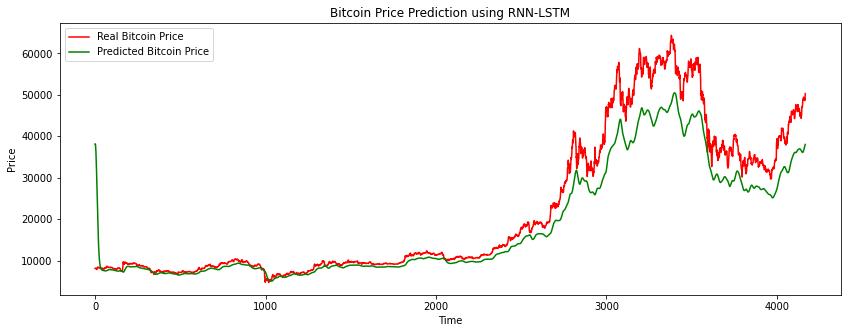

In [18]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()